In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
111748
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [4]:
def get_symbol_gravity(input_str: str):
    symbol_gravity: dict[str, dict] = {}

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            continue

        prev_idx = inp_idx - 1
        prev_inp = input_str[prev_idx]

        grav_key = prev_inp + inp
        symbol_gravity.setdefault(grav_key, 0)
        symbol_gravity[grav_key] += 1

    # sort
    symbol_gravity = dict(sorted(symbol_gravity.items(), key=lambda item: item[1], reverse=True))

    return symbol_gravity
        
symbol_gravity = get_symbol_gravity(input_str)
for k, v in symbol_gravity.items():
    print(k, v)

e  3756
t  3078
d  2967
 t 2913
 a 2662
he 2541
th 2339
 h 1915
 s 1914
s  1902
 w 1764
 i 1762
in 1736
an 1571
n  1429
nd 1278
er 1263
y  1239
ou 1205
o  1162
 o 1146
it 1088
 p 1071
r  1054
ng 1020
 b 1002
ha 1001
re 993
oo 915
to 907
g  906
hi 875
h  874
at 864
is 820
ai 762
id 760
sa 736
on 728
 c 714
as 712
le 699
en 693
a  685
 r 679
st 673
l  657
f  648
ed 643
ll 640
or 610
 f 604
 d 586
 l 571
po 567
 m 564
wa 549
me 546
yo 528
al 525
se 511
wh 510
ve 487
oh 484
et 484
ro 479
 y 476
ho 470
be 462
ea 461
ee 459
of 444
ow 443
ar 441
i  422
so 408
te 406
es 406
no 406
ut 403
 g 403
 n 397
ri 391
el 378
ne 368
lo 368
 e 366
ch 365
ig 361
ly 355
ot 351
u  347
ti 340
we 338
bi 336
om 330
us 322
m  319
li 314
im 311
pi 311
ra 311
nt 310
do 306
ad 302
ey 293
w  292
ul 292
de 291
k  290
ke 285
wi 275
co 271
ca 266
n' 261
ay 260
p  258
't 258
ld 257
fo 246
gh 244
gl 244
ab 242
go 238
op 232
's 230
tt 217
sh 216
 u 215
bo 214
ht 209
ry 209
il 207
ga 200
wo 197
pe 193
un 192
 k 190
ur 187


In [17]:
TF_per_symbol = transition_freedom(input_str)
TF = []
for inp in input_str:
    TF.append(TF_per_symbol[inp])
print(len(TF), TF[:400])

111748 [16, 15, 22, 16, 18, 26, 22, 25, 22, 26, 25, 14, 15, 22, 16, 15, 25, 14, 26, 25, 22, 22, 26, 25, 22, 26, 18, 22, 26, 21, 18, 16, 26, 21, 25, 18, 26, 25, 14, 22, 26, 26, 22, 26, 25, 18, 15, 26, 25, 16, 26, 26, 15, 25, 22, 26, 21, 25, 21, 26, 15, 26, 25, 11, 26, 26, 21, 25, 22, 26, 21, 25, 18, 15, 26, 25, 21, 18, 26, 22, 22, 26, 21, 25, 11, 26, 12, 22, 26, 25, 15, 26, 22, 26, 25, 22, 21, 25, 26, 21, 14, 22, 22, 21, 25, 11, 26, 22, 22, 25, 16, 26, 15, 22, 26, 12, 25, 21, 26, 14, 26, 21, 18, 22, 22, 22, 21, 25, 26, 26, 14, 25, 11, 18, 15, 16, 25, 11, 18, 15, 16, 25, 11, 18, 15, 16, 25, 26, 26, 25, 18, 15, 26, 25, 11, 22, 16, 12, 25, 26, 12, 25, 15, 22, 21, 25, 15, 26, 22, 21, 25, 11, 26, 15, 22, 26, 21, 25, 16, 15, 22, 22, 21, 18, 26, 16, 15, 26, 22, 25, 22, 26, 11, 22, 26, 25, 22, 18, 25, 22, 21, 25, 22, 21, 25, 12, 22, 22, 25, 22, 21, 25, 15, 26, 25, 12, 26, 26, 14, 21, 25, 18, 15, 26, 25, 26, 26, 20, 12, 25, 14, 22, 12, 25, 26, 12, 25, 16, 26, 15, 22, 26, 12, 25, 21, 26, 14, 26, 

In [18]:
def get_word_stats(input_str: str | list, TF: list, ):
    buffer: list = [input_str[0]]
    WordStats: dict[str, int] = {}

    prev_tf = TF[0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            continue

        if TF[inp_idx] - prev_tf > 0.0: # and abs(TF[inp_idx] - prev_tf) > 0.2:
            word = ''.join(buffer)

            WordStats.setdefault(word, 0)
            WordStats[word] += 1

            buffer = [inp]
            prev_tf = TF[inp_idx]
            
            continue

        buffer.append(inp)
        prev_tf = TF[inp_idx]
    
    # sort
    WordStats = dict(sorted(WordStats.items(), key=lambda item: item[1], reverse=True))

    return WordStats

WordStats_L1 = get_word_stats(input_str=input_str, TF=TF)
print(len(WordStats_L1))
mean_WS = np.mean(np.array(list(WordStats_L1.values())))
print(f'{mean_WS=}')
WS_len = 0
for key, val in WordStats_L1.items():
    if len(key.strip()) > 1 and val >= mean_WS:
        WS_len += 1
    print(key, val)
print(f'{WS_len=}')

1163
mean_WS=41.87532244196045
  1418
 th 1333
 h 1307
 a 1221
 w 1210
i 1168
nd 1137
 s 949
er 936
ng 936
l 921
ou 850
 p 791
h 738
 b 703
s 697
 t 668
 i 587
at 565
aid 555
ed 552
r 486
 it 473
a 453
or 434
 l 431
u 420
ooh 419
 d 415
of 402
 f 399
as 390
 r 372
e w 366
 m 354
t 350
is 349
 y 330
 c 325
d 323
et 320
om 308
ow 302
ig 295
e h 279
 g 279
e  273
ay 259
im 250
e s 241
e th 234
e a 231
it 213
' 209
out 203
ad 202
es 195
n't 193
e t 191
e b 187
e p 163
p 161
ob 159
id 157
rist 156
oph 156
 ch 154
ut 153
all 151
 k 145
ell 143
now 140
ery 139
o h 139
e f 138
nt 137
ent 137
ook 137
 is 136
 v 133
ith 132
 as 126
 at 126
ear 125
e c 125
oug 125
st 122
 all 120
ol 118
eey 118
ey 117
n a 115
 j 114
av 114
ot 109
 sh 106
nk 104
 rabb 101
ai 98
n th 97
e m 96
itt 96
o th 95
e d 92
ec 90
em 88
est 86
 if 85
ny 85
ong 84
e g 83
e l 82
ri 82
 up 82
ly 80
ik 80
n h 79
elf 79
e i 78
 ab 78
ex 77
ev 77
o  77
ov 77
il 75
 st 74
eth 74
ood 73
not 71
e y 69
o s 68
y 68
el 67
oh 65
ar 64
op

(400,)


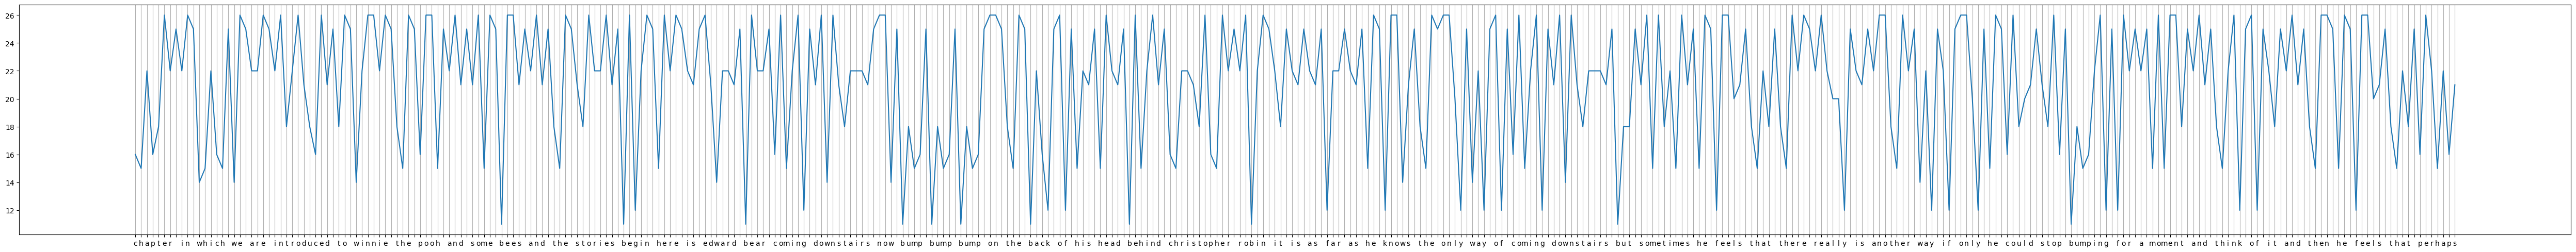

In [19]:
length = 400

TF = TF[:length]

TF = np.array(TF, dtype=float)
print(TF.shape)
# TF = np.pad(TF, (1, 0))[:-1] - TF
# TF = TF - np.pad(TF, (1, 0))[:-1]
# # print(TF)
# TF[np.where(TF > 0)] = 0
# TF = np.abs(TF)
# TF[np.where(TF <= np.mean(TF))] = 0
# # TF[np.where(TF <= 0.5)] = 0
# print(TF.size, TF.max(), TF.min())

# KF = np.array(KF)
# KF = KF - np.pad(KF, (0, 1))[1:]
# # print(TF)
# KF[np.where(KF < 0)] = 0
# KF = np.abs(KF)
# KF[np.where(KF <= np.mean(KF[np.where(KF > 0)]))] = 0

# # TF /= np.max(TF)
# KF /= np.max(KF)

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
# axs.plot(np.arange(TF.size), TF)
axs.plot(np.arange(TF.size), TF)
axs.xaxis.set_ticks(np.arange(len(input_str[:length])) ,input_str[:length])
axs.xaxis.grid(True)

plt.show()